# A)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

A1)

In [2]:
ds = pd.read_csv('student-mat.csv')

In [64]:
pd.set_option('display.max_columns',500)
ds.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


A2)

In [62]:
attributes = len(ds.columns)
attributes

33

In [19]:
dimension = np.shape(ds)
dimension

(395, 33)

A3)

In [55]:
from statistics import mean, mode, median
df1 = ds['Dalc']
average_dalc = round(mean(df1),2)
average_dalc

1.48

In [28]:
df2 = ds['Walc']
average_walc = round(mean(df2),2)
average_walc

2.29

In [30]:
df3 = ds['absences']
average_absence = round(mean(df3),2)
average_absence

5.71

A4)

In [32]:
max_absence = max(df3)
max_absence

75

In [33]:
min_absence = min(df3)
min_absence

0

A5)

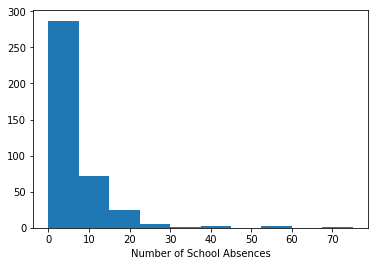

In [59]:
plt.hist(df3)
plt.xlabel('Number of School Absences')
plt.show()

A6)

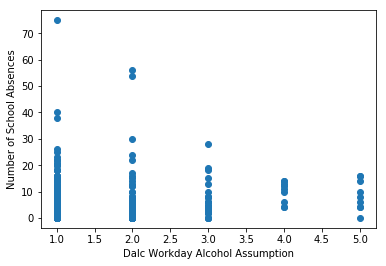

In [60]:
plt.scatter(df1,df3)
plt.xlabel('Dalc Workday Alcohol Assumption')
plt.ylabel('Number of School Absences')
plt.show()

A7)

In [44]:
df1.corr(df3)

0.11190802615038616

In [46]:
range_absence = max_absence - min_absence
range_absence

75

In [53]:
mode_absence = mode(df3)
mode_absence

0

# B)

In [124]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

STEP 4

In [125]:
x = ds.iloc[:,[2,19,26,27]].values
y = ds.iloc[:,20].values

STEP 5

In [126]:
labelencoder_X = LabelEncoder()
x[:, 1] = labelencoder_X.fit_transform(x[:, 1])

STEP 6

In [127]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

STEP 7

In [133]:
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.fit_transform(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


STEP 8

In [134]:
model = GaussianNB()
model.fit(x_train,y_train)

GaussianNB(priors=None)

STEP 9

In [135]:
y_predict = model.predict(x_test)

STEP 10

In [136]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)
print(cm)

[[ 0  7]
 [ 2 90]]


STEP 11

In [141]:
accuracy = 90/99
print(round(accuracy*100,2), '%')

90.91 %


# C

In [150]:
x1 = ds.iloc[:,[30,31]].values
y1 = ds.iloc[:, -1].values

In [151]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size = 0.25, random_state = 0)

In [160]:
from sklearn.linear_model import LinearRegression

In [163]:
model1 = LinearRegression()
model1.fit(x1_train,y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [172]:
y1_predict = model1.predict(x1_test)

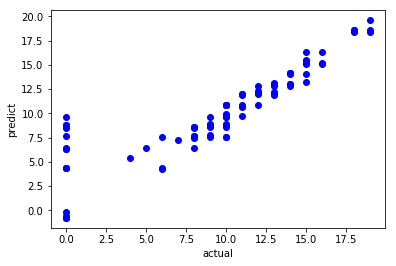

In [177]:
plt.scatter(y1_test,y1_predict, color = 'blue')
plt.xlabel('actual')
plt.ylabel('predict')
plt.show()